This assignment is based on Support Vector Machines.

**Instructions for this assignment:**


1.   Certain sections of code are missing are have being replaced by 'pass'. You need to replace 'pass' with your block of code by following the instructions provided.  




# Linear SVM

In [8]:
#Importing Libraries

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC # A module of scikit-learn library used for implementing SVM. SVC stands for Support Vector Classifier

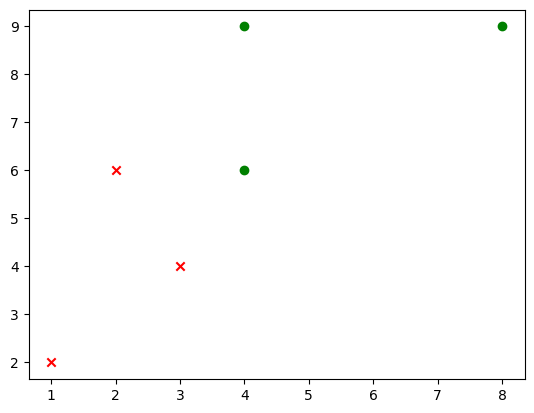

In [9]:
#Preparation of dataset

x = np.array([[1,2],[4,6],[8,9], [3,4], [2,6], [4,9]])
y = np.array([0, 1, 1, 0, 0, 1])
for i in range(y.shape[0]):
  if (y[i]==0):
      plt.scatter(x[i][0], x[i][1],color='red', marker='x')
  else:
      plt.scatter(x[i][0], x[i][1],color='green', marker='o')

**Task 1**: Read about kernel argument of SVC and replace kernal_used by the kernel required for linear SVM.

In [10]:
kernel_used = 'linear'
Classifier = SVC(gamma = 'auto', kernel = kernel_used)
Classifier.fit(x, y)

SVC(gamma='auto', kernel='linear')

**Task 1:** Find the equation of boundary by using the parameters

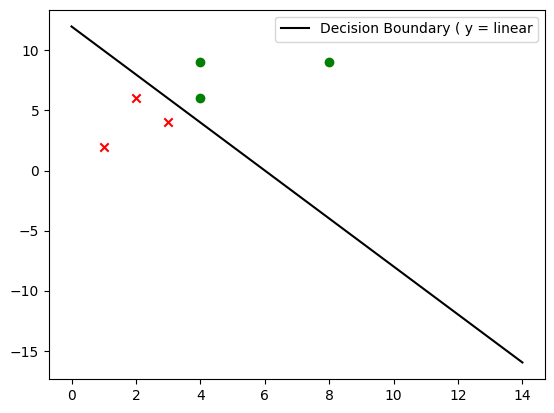

In [11]:
#####
weight_matrix = Classifier.coef_[0]
slope = -weight_matrix[0]/weight_matrix[1]
bias = - Classifier.intercept_[0]/weight_matrix[1]
val = np.linspace(0, 14)
boundary = slope * val + bias
#####

plt.plot(val, boundary, 'k', label = f"Decision Boundary ( y = linear") #write the equation for the decision boundary using the variables used above

for i in range(y.shape[0]):
  if (y[i]==0):
      plt.scatter(x[i][0], x[i][1],color='red', marker='x')
  else:
      plt.scatter(x[i][0], x[i][1],color='green', marker='o')

plt.legend()
plt.show()

# Non- Linear SVM

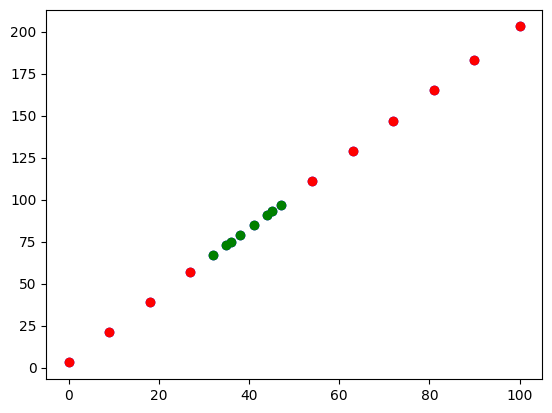

In [12]:
#Preparation of dataset
x1 = np.linspace(0, 100, 12, dtype=int)
x1 = np.append(x1, np.linspace(30, 50, 8, dtype=int))
x1 = np.sort(x1)
x1 = np.delete(x1, np.where(x1 == 30))
x1 = np.delete(x1, np.where(x1 == 50))
n = x1.size
x2 = 2*x1+3
coordinates = np.column_stack((x1, x2))
label = np.zeros(n, dtype=int)
plt.scatter(x1, x2, color="blue")
for i in range(n):
  if(30<x1[i]<50):
    label[i]=1
    plt.scatter(x1[i],x2[i],color="green")
  else:
    label[i]=0
    plt.scatter(x1[i],x2[i],color="red")

**Answer the following questions** \\
Q: Is the above dataset linearly separable?

Q. How many classes are there in the above dataset?

Q. How many features are used in the above dataset?

Q. What will be dimension of hyperplane used for this dataset?  

#Splitting the Dataset
**Task**: Split the given dataset into training and testing data. The code snippet to illustrate the data has been given.

In [ ]:
# Data is not linear
# Data Has 2 classes
# 2 features are used in data
# Infinte dimensional Hyper plane is needed for seperation of data

In [13]:
from sklearn.model_selection import train_test_split

In [132]:
print(coordinates) ; print(label)

[[  0   3]
 [  9  21]
 [ 18  39]
 [ 27  57]
 [ 32  67]
 [ 35  73]
 [ 36  75]
 [ 38  79]
 [ 41  85]
 [ 44  91]
 [ 45  93]
 [ 47  97]
 [ 54 111]
 [ 63 129]
 [ 72 147]
 [ 81 165]
 [ 90 183]
 [100 203]]
[0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0]


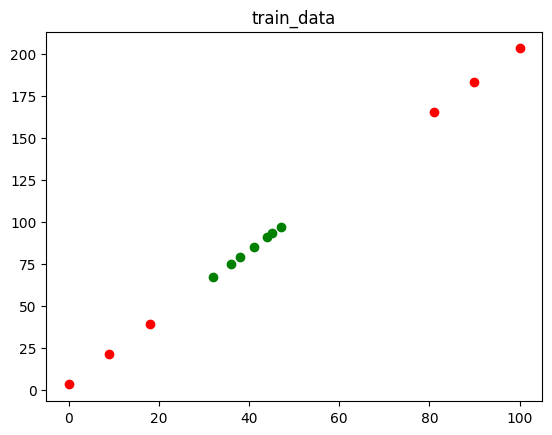

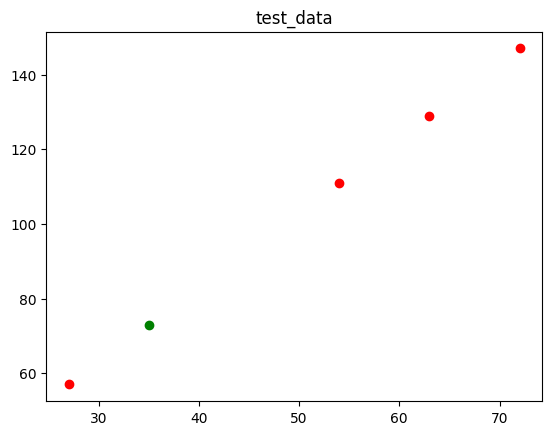

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(coordinates, label)
for i in range (X_train.T[0].size):
  if(Y_train[i]==1):
    plt.scatter(X_train[i][0], X_train[i][1], color="green")
  else:
    plt.scatter(X_train[i][0], X_train[i][1], color="red")
plt.title('train_data')
plt.show()

for i in range (X_test.T[0].size):
  if(Y_test[i]==1):
    plt.scatter(X_test[i][0], X_test[i][1], color="green")
  else:
    plt.scatter(X_test[i][0], X_test[i][1], color="red")
plt.title('test_data')
plt.show()

# Non Linear Classifier
**Task 1**: Generate a classifier for the above dataset using suitable kernel function. Also, provide an explanation for your choice of kernel. \\
**Task 2**: Explain and illustrate, using plots, how the kernel used, enables the data to be classified using a SVC.

In [125]:
Classifier = SVC(kernel='rbf', gamma=0.1)
Classifier.fit(X_train, Y_train)
# I have chosen rbf kerenl(gaussian) because the Data of one class is 
# concentrated in one region which need a classifier that should circle
# the data which can be achived by this kerenl.

SVC(gamma=0.1)

In [131]:
Ypred = Classifier.predict(X_test)
Ypred

array([0, 0, 1, 0, 0])

In [127]:
Y_test

array([0, 0, 1, 0, 0])

In [128]:
sv = Classifier.support_vectors_

In [129]:
from sklearn.inspection import DecisionBoundaryDisplay

In [ ]:
# Using Kernels is Equivalent to map the input data Higher dimensional space
#Where data can be classified linear ,in above rbf kerenel data is transformed
# to infinite dimensinal space.

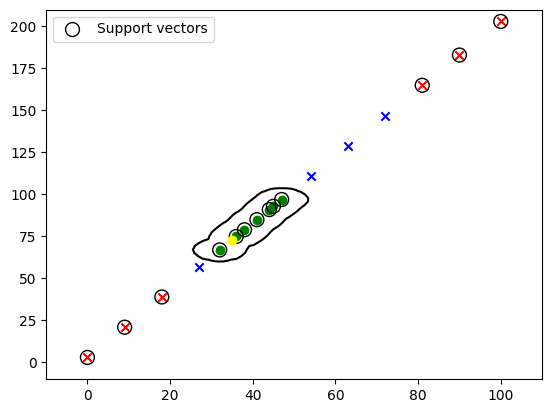

In [130]:
fig, axs = plt.subplots(1)
xmin, xmax, ymin, ymax = -10, 110, -10, 210
axs.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

DecisionBoundaryDisplay.from_estimator(
    estimator=Classifier,
    X=X_train,
    ax=axs,
    response_method='decision_function',
    plot_method='contour',
    levels=1,
    colors='k',
    linestyles='-'
)

for i in range(Y_train.shape[0]):
  if (Y_train[i]==0):
      axs.scatter(X_train[i][0], X_train[i][1],color='red', marker='x')
  else:
      axs.scatter(X_train[i][0], X_train[i][1],color='green', marker='o')
      
# SUPPORT VECTORS FOR THE DECISION BOUNDARY
axs.scatter(sv[:, 0], sv[:, 1], marker='o', c='none' ,edgecolors='k', s=100, label='Support vectors')
axs.legend()
# PLOT THE TEST DATA
for i in range(Y_test.shape[0]):
  if (Y_test[i]==0):
      axs.scatter(X_test[i][0], X_test[i][1],color='blue', marker='x')
  else:
      axs.scatter(X_test[i][0], X_test[i][1],color='yellow', marker='o')

if axs :
    plt.show()